In [1]:
import matplotlib.pyplot as plt
import fidimag
import fidimag.common.constant as C
import numpy as np
%matplotlib inline
plt.style.use('../lato_style.mplstyle')

In [2]:
# System parameters
L = 100

# Some atomistic parameters
J = 5.88 * C.meV
D = 1.56 * C.meV
Ku = 0.41 * C.meV
mus = 3 * C.mu_B

# Lattice constants (in nm)
a = 0.2715
az = 0.408

# Magnetic field in Tesla
B = 2

# Free electron gyrom ratio
gamma = 1.76e11


In [3]:
import imp
imp.reload(fidimag)

<module 'fidimag' from '/home/david/git/fidimag/fidimag/__init__.py'>

In [4]:
nx, ny, nz = 100, 1, 1
dx, dy, dz = a, a, az

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, 
                                periodicity=(False, False, False),
                                unit_length=1e-9)


In [5]:
sim = fidimag.atomistic.Sim(mesh, name='one_dim', driver='minimiser')
       
# Define the magnetisation
sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))

xs = mesh.coordinates[:, 0]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 
       
def m_initial(r):
    x, y, z = r[0], r[1], r[2]
    if np.abs(x - centre_x) < 2:
        return (0, 0.1, -.9)
    else:
        return (0, 0.1, .9)

# sim.set_m((0.1, 0, 0.9))
sim.set_m(m_initial)

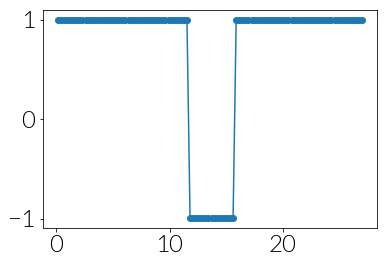

In [6]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 2], 'o-')

In [7]:
sim.driver.minimize(max_count=5000, stopping_dm=1e-10)

#max_dm=0.011      counter=0
#max_dm=0.01       counter=1
#max_dm=0.00884    counter=2
#max_dm=0.00761    counter=3
#max_dm=0.00644    counter=4
#max_dm=0.00536    counter=5
#max_dm=0.00441    counter=6
#max_dm=0.00361    counter=7
#max_dm=0.00293    counter=8
#max_dm=0.00238    counter=9
#max_dm=0.00194    counter=10
#max_dm=0.00158    counter=11
#max_dm=0.00129    counter=12
#max_dm=0.00106    counter=13
#max_dm=0.000871   counter=14
#max_dm=0.000722   counter=15
#max_dm=0.000603   counter=16
#max_dm=0.000506   counter=17
#max_dm=0.000428   counter=18
#max_dm=0.000392   counter=19
#max_dm=0.000369   counter=20
#max_dm=0.000347   counter=21
#max_dm=0.000326   counter=22
#max_dm=0.000306   counter=23
#max_dm=0.000287   counter=24
#max_dm=0.000269   counter=25
#max_dm=0.000252   counter=26
#max_dm=0.000237   counter=27
#max_dm=0.000222   counter=28
#max_dm=0.000208   counter=29
#max_dm=0.000196   counter=30
#max_dm=0.000184   counter=31
#max_dm=0.000173   counter=32
#max_dm=0.000163   c

#max_dm=6.82e-09   counter=1461
#max_dm=6.76e-09   counter=1462
#max_dm=6.7e-09    counter=1463
#max_dm=6.65e-09   counter=1464
#max_dm=6.59e-09   counter=1465
#max_dm=6.54e-09   counter=1466
#max_dm=6.48e-09   counter=1467
#max_dm=6.43e-09   counter=1468
#max_dm=6.38e-09   counter=1469
#max_dm=6.32e-09   counter=1470
#max_dm=6.27e-09   counter=1471
#max_dm=6.22e-09   counter=1472
#max_dm=6.17e-09   counter=1473
#max_dm=6.11e-09   counter=1474
#max_dm=6.06e-09   counter=1475
#max_dm=6.01e-09   counter=1476
#max_dm=5.96e-09   counter=1477
#max_dm=5.91e-09   counter=1478
#max_dm=5.86e-09   counter=1479
#max_dm=5.82e-09   counter=1480
#max_dm=5.77e-09   counter=1481
#max_dm=5.72e-09   counter=1482
#max_dm=5.67e-09   counter=1483
#max_dm=5.62e-09   counter=1484
#max_dm=5.58e-09   counter=1485
#max_dm=5.53e-09   counter=1486
#max_dm=5.49e-09   counter=1487
#max_dm=5.44e-09   counter=1488
#max_dm=5.39e-09   counter=1489
#max_dm=5.35e-09   counter=1490
#max_dm=5.3e-09    counter=1491
#max_dm=

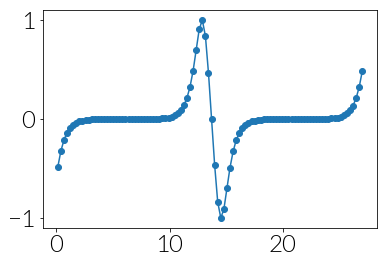

In [8]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 0], 'o-')

## LLG

In [9]:
sim = fidimag.atomistic.Sim(mesh, name='one_dim', driver='llg')
       
# Define the magnetisation
sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))

xs = mesh.coordinates[:, 0]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 
       
def m_initial(r):
    x, y, z = r[0], r[1], r[2]
    if np.abs(x - centre_x) < 2:
        return (0, 0.1, -.9)
    else:
        return (0, 0.1, .9)

# sim.set_m((0.1, 0, 0.9))
sim.set_m(m_initial)

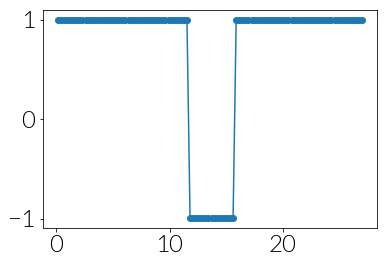

In [10]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 2], 'o-')

In [11]:
sim.driver.do_precession = False
sim.relax()

#1    t=1e-11    dt=1e-11 max_dmdt=1.77
#2    t=3.53e-10 dt=3.43e-10 max_dmdt=1.77
#3    t=3.79e-09 dt=3.43e-09 max_dmdt=1.77
#4    t=3.81e-08 dt=3.43e-08 max_dmdt=1.77
#5    t=3.81e-07 dt=3.43e-07 max_dmdt=1.77
#6    t=3.81e-06 dt=3.43e-06 max_dmdt=1.77
#7    t=2.51e-05 dt=2.13e-05 max_dmdt=1.77
#8    t=8.19e-05 dt=5.67e-05 max_dmdt=1.77
#9    t=0.000197 dt=0.000115 max_dmdt=1.77
#10   t=0.000417 dt=0.00022 max_dmdt=1.77
#11   t=0.000637 dt=0.00022 max_dmdt=1.77
#12   t=0.000856 dt=0.00022 max_dmdt=1.77
#13   t=0.00108  dt=0.00022 max_dmdt=1.77
#14   t=0.00161  dt=0.000532 max_dmdt=1.78
#15   t=0.00214  dt=0.000532 max_dmdt=1.78
#16   t=0.00267  dt=0.000532 max_dmdt=1.78
#17   t=0.0032   dt=0.000532 max_dmdt=1.78
#18   t=0.00374  dt=0.000532 max_dmdt=1.79
#19   t=0.00483  dt=0.00109 max_dmdt=1.79
#20   t=0.00591  dt=0.00109 max_dmdt=1.8
#21   t=0.007    dt=0.00109 max_dmdt=1.8
#22   t=0.00809  dt=0.00109 max_dmdt=1.81
#23   t=0.00918  dt=0.00109 max_dmdt=1.82
#24   t=0.0109   dt=0.001

#258  t=7.96     dt=0.115 max_dmdt=0.129
#259  t=8.07     dt=0.115 max_dmdt=0.126
#260  t=8.19     dt=0.115 max_dmdt=0.124
#261  t=8.3      dt=0.115 max_dmdt=0.121
#262  t=8.42     dt=0.115 max_dmdt=0.12
#263  t=8.53     dt=0.115 max_dmdt=0.118
#264  t=8.65     dt=0.115 max_dmdt=0.117
#265  t=8.76     dt=0.115 max_dmdt=0.116
#266  t=8.88     dt=0.115 max_dmdt=0.114
#267  t=8.99     dt=0.115 max_dmdt=0.113
#268  t=9.11     dt=0.115 max_dmdt=0.111
#269  t=9.22     dt=0.115 max_dmdt=0.109
#270  t=9.34     dt=0.115 max_dmdt=0.108
#271  t=9.45     dt=0.115 max_dmdt=0.106
#272  t=9.57     dt=0.115 max_dmdt=0.104
#273  t=9.68     dt=0.115 max_dmdt=0.102
#274  t=9.8      dt=0.115 max_dmdt=0.101
#275  t=9.91     dt=0.115 max_dmdt=0.0988
#276  t=10       dt=0.115 max_dmdt=0.0969
#277  t=10.1     dt=0.115 max_dmdt=0.095
#278  t=10.3     dt=0.115 max_dmdt=0.0931
#279  t=10.4     dt=0.115 max_dmdt=0.0912
#280  t=10.5     dt=0.115 max_dmdt=0.0893
#281  t=10.6     dt=0.115 max_dmdt=0.0874
#282  t=10.

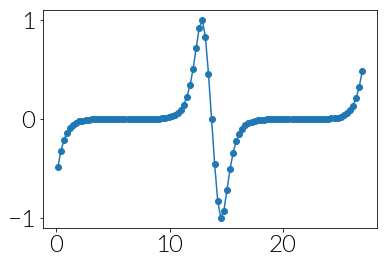

In [12]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 0], 'o-')

# 2D skyrmion

In [30]:
nx, ny, nz = 100, 100, 1
dx, dy, dz = a, a, az

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, 
                                periodicity=(False, False, False),
                                unit_length=1e-9)
xs = mesh.coordinates[:, 0]
ys = mesh.coordinates[:, 1]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 

In [31]:
sim = fidimag.atomistic.Sim(mesh, name='one_dim', driver='llg')
       
# Define the magnetisation
def material(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    
    if x ** 2 + y ** 2 < (np.max(xs) - centre_x) ** 2:
        return mus
    else:
        return 0
    
sim.set_mu_s(material)
# sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))
    
def m_initial(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    if x ** 2 + y ** 2 < 1 ** 2:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

sim.set_m(m_initial)
# sim.set_m((0, 0, 1))

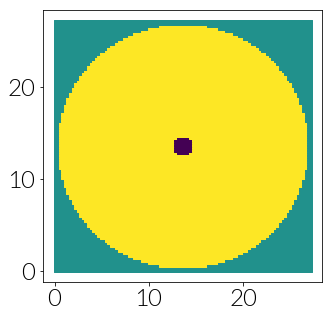

In [32]:
plt.figure(figsize=(5, 5))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2], s=20, marker='s')

In [33]:
%%capture
sim.driver.do_precession = False
sim.driver.relax()

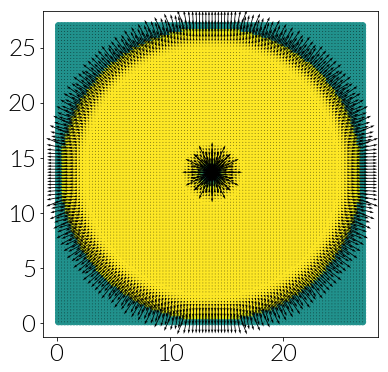

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2], vmin=-1, vmax=1)

plt.quiver(xs, ys, sim.spin.reshape(-1, 3)[:, 0], sim.spin.reshape(-1, 3)[:, 1])

## Steepest Descent

In [24]:
nx, ny, nz = 100, 100, 1
dx, dy, dz = a, a, az

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, 
                                periodicity=(False, False, False),
                                unit_length=1e-9)
xs = mesh.coordinates[:, 0]
ys = mesh.coordinates[:, 1]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 

In [25]:
sim = fidimag.atomistic.Sim(mesh, name='two_dim', driver='minimiser')
       
# Define the magnetisation
def material(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    
    if x ** 2 + y ** 2 < (np.max(xs) - centre_x) ** 2:
        return mus
    else:
        return 0
    
sim.set_mu_s(material)
# sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))
       
def m_initial(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    if x ** 2 + y ** 2 < 1:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

sim.set_m(m_initial)
# sim.set_m((0, 0, 1))

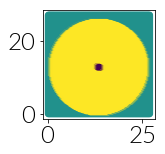

In [26]:
plt.figure(figsize=(2, 2))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2])

In [27]:
sim.driver.minimize(max_count=5000, stopping_dm=1e-11)

#max_dm=0.0116     counter=0
#max_dm=0.0108     counter=1
#max_dm=0.00977    counter=2
#max_dm=0.00865    counter=3
#max_dm=0.00752    counter=4
#max_dm=0.00644    counter=5
#max_dm=0.00547    counter=6
#max_dm=0.00461    counter=7
#max_dm=0.00387    counter=8
#max_dm=0.00325    counter=9
#max_dm=0.00273    counter=10
#max_dm=0.00229    counter=11
#max_dm=0.00194    counter=12
#max_dm=0.00164    counter=13
#max_dm=0.0014     counter=14
#max_dm=0.0013     counter=15
#max_dm=0.00123    counter=16
#max_dm=0.00116    counter=17
#max_dm=0.00108    counter=18
#max_dm=0.00101    counter=19
#max_dm=0.000943   counter=20
#max_dm=0.000876   counter=21
#max_dm=0.000811   counter=22
#max_dm=0.00075    counter=23
#max_dm=0.000692   counter=24
#max_dm=0.000638   counter=25
#max_dm=0.000587   counter=26
#max_dm=0.00054    counter=27
#max_dm=0.000496   counter=28
#max_dm=0.000461   counter=29
#max_dm=0.000428   counter=30
#max_dm=0.000397   counter=31
#max_dm=0.000368   counter=32
#max_dm=0.000341   c

#max_dm=1.78e-07   counter=411
#max_dm=1.77e-07   counter=412
#max_dm=1.76e-07   counter=413
#max_dm=1.76e-07   counter=414
#max_dm=1.75e-07   counter=415
#max_dm=1.74e-07   counter=416
#max_dm=1.73e-07   counter=417
#max_dm=1.72e-07   counter=418
#max_dm=1.71e-07   counter=419
#max_dm=1.7e-07    counter=420
#max_dm=1.7e-07    counter=421
#max_dm=1.69e-07   counter=422
#max_dm=1.68e-07   counter=423
#max_dm=1.67e-07   counter=424
#max_dm=1.66e-07   counter=425
#max_dm=1.66e-07   counter=426
#max_dm=1.65e-07   counter=427
#max_dm=1.64e-07   counter=428
#max_dm=1.63e-07   counter=429
#max_dm=1.62e-07   counter=430
#max_dm=1.62e-07   counter=431
#max_dm=1.61e-07   counter=432
#max_dm=1.6e-07    counter=433
#max_dm=1.6e-07    counter=434
#max_dm=1.59e-07   counter=435
#max_dm=1.58e-07   counter=436
#max_dm=1.57e-07   counter=437
#max_dm=1.57e-07   counter=438
#max_dm=1.56e-07   counter=439
#max_dm=1.55e-07   counter=440
#max_dm=1.55e-07   counter=441
#max_dm=1.54e-07   counter=442
#max_dm=

#max_dm=5.82e-08   counter=823
#max_dm=5.81e-08   counter=824
#max_dm=5.8e-08    counter=825
#max_dm=5.79e-08   counter=826
#max_dm=5.78e-08   counter=827
#max_dm=5.77e-08   counter=828
#max_dm=5.76e-08   counter=829
#max_dm=5.75e-08   counter=830
#max_dm=5.74e-08   counter=831
#max_dm=5.73e-08   counter=832
#max_dm=5.72e-08   counter=833
#max_dm=5.71e-08   counter=834
#max_dm=5.7e-08    counter=835
#max_dm=5.69e-08   counter=836
#max_dm=5.68e-08   counter=837
#max_dm=5.67e-08   counter=838
#max_dm=5.66e-08   counter=839
#max_dm=5.65e-08   counter=840
#max_dm=5.64e-08   counter=841
#max_dm=5.63e-08   counter=842
#max_dm=5.62e-08   counter=843
#max_dm=5.61e-08   counter=844
#max_dm=5.6e-08    counter=845
#max_dm=5.59e-08   counter=846
#max_dm=5.58e-08   counter=847
#max_dm=5.57e-08   counter=848
#max_dm=5.56e-08   counter=849
#max_dm=5.55e-08   counter=850
#max_dm=5.54e-08   counter=851
#max_dm=5.53e-08   counter=852
#max_dm=5.52e-08   counter=853
#max_dm=5.51e-08   counter=854
#max_dm=

#max_dm=2.82e-08   counter=1252
#max_dm=2.81e-08   counter=1253
#max_dm=2.81e-08   counter=1254
#max_dm=2.8e-08    counter=1255
#max_dm=2.8e-08    counter=1256
#max_dm=2.79e-08   counter=1257
#max_dm=2.79e-08   counter=1258
#max_dm=2.78e-08   counter=1259
#max_dm=2.78e-08   counter=1260
#max_dm=2.77e-08   counter=1261
#max_dm=2.77e-08   counter=1262
#max_dm=2.76e-08   counter=1263
#max_dm=2.76e-08   counter=1264
#max_dm=2.76e-08   counter=1265
#max_dm=2.75e-08   counter=1266
#max_dm=2.75e-08   counter=1267
#max_dm=2.74e-08   counter=1268
#max_dm=2.74e-08   counter=1269
#max_dm=2.73e-08   counter=1270
#max_dm=2.73e-08   counter=1271
#max_dm=2.72e-08   counter=1272
#max_dm=2.72e-08   counter=1273
#max_dm=2.71e-08   counter=1274
#max_dm=2.71e-08   counter=1275
#max_dm=2.71e-08   counter=1276
#max_dm=2.7e-08    counter=1277
#max_dm=2.7e-08    counter=1278
#max_dm=2.69e-08   counter=1279
#max_dm=2.69e-08   counter=1280
#max_dm=2.68e-08   counter=1281
#max_dm=2.68e-08   counter=1282
#max_dm=

#max_dm=1.41e-08   counter=1667
#max_dm=1.41e-08   counter=1668
#max_dm=1.41e-08   counter=1669
#max_dm=1.41e-08   counter=1670
#max_dm=1.4e-08    counter=1671
#max_dm=1.4e-08    counter=1672
#max_dm=1.4e-08    counter=1673
#max_dm=1.4e-08    counter=1674
#max_dm=1.4e-08    counter=1675
#max_dm=1.39e-08   counter=1676
#max_dm=1.39e-08   counter=1677
#max_dm=1.39e-08   counter=1678
#max_dm=1.39e-08   counter=1679
#max_dm=1.38e-08   counter=1680
#max_dm=1.38e-08   counter=1681
#max_dm=1.38e-08   counter=1682
#max_dm=1.38e-08   counter=1683
#max_dm=1.37e-08   counter=1684
#max_dm=1.37e-08   counter=1685
#max_dm=1.37e-08   counter=1686
#max_dm=1.37e-08   counter=1687
#max_dm=1.37e-08   counter=1688
#max_dm=1.36e-08   counter=1689
#max_dm=1.36e-08   counter=1690
#max_dm=1.36e-08   counter=1691
#max_dm=1.36e-08   counter=1692
#max_dm=1.35e-08   counter=1693
#max_dm=1.35e-08   counter=1694
#max_dm=1.35e-08   counter=1695
#max_dm=1.35e-08   counter=1696
#max_dm=1.35e-08   counter=1697
#max_dm=

#max_dm=7.04e-09   counter=2094
#max_dm=7.03e-09   counter=2095
#max_dm=7.02e-09   counter=2096
#max_dm=7.01e-09   counter=2097
#max_dm=6.99e-09   counter=2098
#max_dm=6.98e-09   counter=2099
#max_dm=6.97e-09   counter=2100
#max_dm=6.96e-09   counter=2101
#max_dm=6.95e-09   counter=2102
#max_dm=6.94e-09   counter=2103
#max_dm=6.93e-09   counter=2104
#max_dm=6.92e-09   counter=2105
#max_dm=6.91e-09   counter=2106
#max_dm=6.89e-09   counter=2107
#max_dm=6.88e-09   counter=2108
#max_dm=6.87e-09   counter=2109
#max_dm=6.86e-09   counter=2110
#max_dm=6.85e-09   counter=2111
#max_dm=6.84e-09   counter=2112
#max_dm=6.83e-09   counter=2113
#max_dm=6.82e-09   counter=2114
#max_dm=6.81e-09   counter=2115
#max_dm=6.8e-09    counter=2116
#max_dm=6.78e-09   counter=2117
#max_dm=6.77e-09   counter=2118
#max_dm=6.76e-09   counter=2119
#max_dm=6.75e-09   counter=2120
#max_dm=6.74e-09   counter=2121
#max_dm=6.73e-09   counter=2122
#max_dm=6.72e-09   counter=2123
#max_dm=6.71e-09   counter=2124
#max_dm=

#max_dm=3.52e-09   counter=2526
#max_dm=3.52e-09   counter=2527
#max_dm=3.51e-09   counter=2528
#max_dm=3.51e-09   counter=2529
#max_dm=3.5e-09    counter=2530
#max_dm=3.49e-09   counter=2531
#max_dm=3.49e-09   counter=2532
#max_dm=3.48e-09   counter=2533
#max_dm=3.48e-09   counter=2534
#max_dm=3.47e-09   counter=2535
#max_dm=3.47e-09   counter=2536
#max_dm=3.46e-09   counter=2537
#max_dm=3.46e-09   counter=2538
#max_dm=3.45e-09   counter=2539
#max_dm=3.44e-09   counter=2540
#max_dm=3.44e-09   counter=2541
#max_dm=3.43e-09   counter=2542
#max_dm=3.43e-09   counter=2543
#max_dm=3.42e-09   counter=2544
#max_dm=3.42e-09   counter=2545
#max_dm=3.41e-09   counter=2546
#max_dm=3.41e-09   counter=2547
#max_dm=3.4e-09    counter=2548
#max_dm=3.39e-09   counter=2549
#max_dm=3.39e-09   counter=2550
#max_dm=3.38e-09   counter=2551
#max_dm=3.38e-09   counter=2552
#max_dm=3.37e-09   counter=2553
#max_dm=3.37e-09   counter=2554
#max_dm=3.36e-09   counter=2555
#max_dm=3.36e-09   counter=2556
#max_dm=

#max_dm=1.75e-09   counter=2960
#max_dm=1.75e-09   counter=2961
#max_dm=1.75e-09   counter=2962
#max_dm=1.74e-09   counter=2963
#max_dm=1.74e-09   counter=2964
#max_dm=1.74e-09   counter=2965
#max_dm=1.73e-09   counter=2966
#max_dm=1.73e-09   counter=2967
#max_dm=1.73e-09   counter=2968
#max_dm=1.73e-09   counter=2969
#max_dm=1.72e-09   counter=2970
#max_dm=1.72e-09   counter=2971
#max_dm=1.72e-09   counter=2972
#max_dm=1.72e-09   counter=2973
#max_dm=1.71e-09   counter=2974
#max_dm=1.71e-09   counter=2975
#max_dm=1.71e-09   counter=2976
#max_dm=1.7e-09    counter=2977
#max_dm=1.7e-09    counter=2978
#max_dm=1.7e-09    counter=2979
#max_dm=1.7e-09    counter=2980
#max_dm=1.69e-09   counter=2981
#max_dm=1.69e-09   counter=2982
#max_dm=1.69e-09   counter=2983
#max_dm=1.69e-09   counter=2984
#max_dm=1.68e-09   counter=2985
#max_dm=1.68e-09   counter=2986
#max_dm=1.68e-09   counter=2987
#max_dm=1.67e-09   counter=2988
#max_dm=1.67e-09   counter=2989
#max_dm=1.67e-09   counter=2990
#max_dm=

#max_dm=8.77e-10   counter=3389
#max_dm=8.76e-10   counter=3390
#max_dm=8.75e-10   counter=3391
#max_dm=8.73e-10   counter=3392
#max_dm=8.72e-10   counter=3393
#max_dm=8.7e-10    counter=3394
#max_dm=8.69e-10   counter=3395
#max_dm=8.68e-10   counter=3396
#max_dm=8.66e-10   counter=3397
#max_dm=8.65e-10   counter=3398
#max_dm=8.63e-10   counter=3399
#max_dm=8.62e-10   counter=3400
#max_dm=8.61e-10   counter=3401
#max_dm=8.59e-10   counter=3402
#max_dm=8.58e-10   counter=3403
#max_dm=8.56e-10   counter=3404
#max_dm=8.55e-10   counter=3405
#max_dm=8.54e-10   counter=3406
#max_dm=8.52e-10   counter=3407
#max_dm=8.51e-10   counter=3408
#max_dm=8.5e-10    counter=3409
#max_dm=8.48e-10   counter=3410
#max_dm=8.47e-10   counter=3411
#max_dm=8.45e-10   counter=3412
#max_dm=8.44e-10   counter=3413
#max_dm=8.43e-10   counter=3414
#max_dm=8.41e-10   counter=3415
#max_dm=8.4e-10    counter=3416
#max_dm=8.39e-10   counter=3417
#max_dm=8.37e-10   counter=3418
#max_dm=8.36e-10   counter=3419
#max_dm=

#max_dm=4.7e-10    counter=3776
#max_dm=4.69e-10   counter=3777
#max_dm=4.69e-10   counter=3778
#max_dm=4.68e-10   counter=3779
#max_dm=4.67e-10   counter=3780
#max_dm=4.66e-10   counter=3781
#max_dm=4.66e-10   counter=3782
#max_dm=4.65e-10   counter=3783
#max_dm=4.64e-10   counter=3784
#max_dm=4.63e-10   counter=3785
#max_dm=4.63e-10   counter=3786
#max_dm=4.62e-10   counter=3787
#max_dm=4.61e-10   counter=3788
#max_dm=4.6e-10    counter=3789
#max_dm=4.6e-10    counter=3790
#max_dm=4.59e-10   counter=3791
#max_dm=4.58e-10   counter=3792
#max_dm=4.57e-10   counter=3793
#max_dm=4.57e-10   counter=3794
#max_dm=4.56e-10   counter=3795
#max_dm=4.55e-10   counter=3796
#max_dm=4.55e-10   counter=3797
#max_dm=4.54e-10   counter=3798
#max_dm=4.53e-10   counter=3799
#max_dm=4.52e-10   counter=3800
#max_dm=4.52e-10   counter=3801
#max_dm=4.51e-10   counter=3802
#max_dm=4.5e-10    counter=3803
#max_dm=4.49e-10   counter=3804
#max_dm=4.49e-10   counter=3805
#max_dm=4.48e-10   counter=3806
#max_dm=

#max_dm=2.39e-10   counter=4196
#max_dm=2.39e-10   counter=4197
#max_dm=2.38e-10   counter=4198
#max_dm=2.38e-10   counter=4199
#max_dm=2.37e-10   counter=4200
#max_dm=2.37e-10   counter=4201
#max_dm=2.37e-10   counter=4202
#max_dm=2.36e-10   counter=4203
#max_dm=2.36e-10   counter=4204
#max_dm=2.36e-10   counter=4205
#max_dm=2.35e-10   counter=4206
#max_dm=2.35e-10   counter=4207
#max_dm=2.34e-10   counter=4208
#max_dm=2.34e-10   counter=4209
#max_dm=2.34e-10   counter=4210
#max_dm=2.33e-10   counter=4211
#max_dm=2.33e-10   counter=4212
#max_dm=2.33e-10   counter=4213
#max_dm=2.32e-10   counter=4214
#max_dm=2.32e-10   counter=4215
#max_dm=2.31e-10   counter=4216
#max_dm=2.31e-10   counter=4217
#max_dm=2.31e-10   counter=4218
#max_dm=2.3e-10    counter=4219
#max_dm=2.3e-10    counter=4220
#max_dm=2.3e-10    counter=4221
#max_dm=2.29e-10   counter=4222
#max_dm=2.29e-10   counter=4223
#max_dm=2.28e-10   counter=4224
#max_dm=2.28e-10   counter=4225
#max_dm=2.28e-10   counter=4226
#max_dm=

#max_dm=1.21e-10   counter=4618
#max_dm=1.21e-10   counter=4619
#max_dm=1.21e-10   counter=4620
#max_dm=1.21e-10   counter=4621
#max_dm=1.2e-10    counter=4622
#max_dm=1.2e-10    counter=4623
#max_dm=1.2e-10    counter=4624
#max_dm=1.2e-10    counter=4625
#max_dm=1.2e-10    counter=4626
#max_dm=1.19e-10   counter=4627
#max_dm=1.19e-10   counter=4628
#max_dm=1.19e-10   counter=4629
#max_dm=1.19e-10   counter=4630
#max_dm=1.19e-10   counter=4631
#max_dm=1.18e-10   counter=4632
#max_dm=1.18e-10   counter=4633
#max_dm=1.18e-10   counter=4634
#max_dm=1.18e-10   counter=4635
#max_dm=1.18e-10   counter=4636
#max_dm=1.18e-10   counter=4637
#max_dm=1.17e-10   counter=4638
#max_dm=1.17e-10   counter=4639
#max_dm=1.17e-10   counter=4640
#max_dm=1.17e-10   counter=4641
#max_dm=1.17e-10   counter=4642
#max_dm=1.16e-10   counter=4643
#max_dm=1.16e-10   counter=4644
#max_dm=1.16e-10   counter=4645
#max_dm=1.16e-10   counter=4646
#max_dm=1.16e-10   counter=4647
#max_dm=1.15e-10   counter=4648
#max_dm=

In [28]:
sim.driver.spin.shape

(30000,)

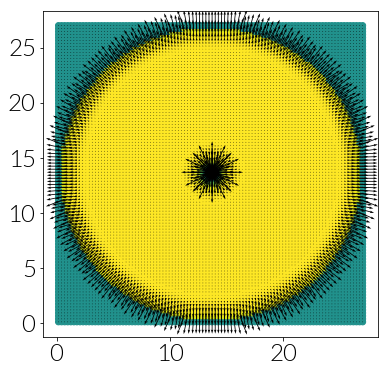

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2], vmin=-1, vmax=1)

plt.quiver(xs, ys, sim.spin.reshape(-1, 3)[:, 0], sim.spin.reshape(-1, 3)[:, 1])